<h2>This Part is dedicated to the analysis of the variables introduced and described in Part I</h2>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

data = pd.read_csv('newData.csv')
data.head()

,age_years,sex,diseases
0,13,Male,0
1,13,Female,1
2,49,Female,2
3,43,Female,1
4,47,Female,0


<h2>Analyzing variable SEX</h2>

In [2]:
x = np.array(data['sex'])
levels, ni = np.unique(x, return_counts=True)
n = sum(ni)
fi = ni/n
ft_age = pd.DataFrame(data=np.transpose([ni,fi]),index=levels,columns=['frequency', 'relative frequency'])
ft_age.to_csv('table_sex.csv')
ft_age

,frequency,relative frequency
Female,155.0,0.509868
Male,149.0,0.490132


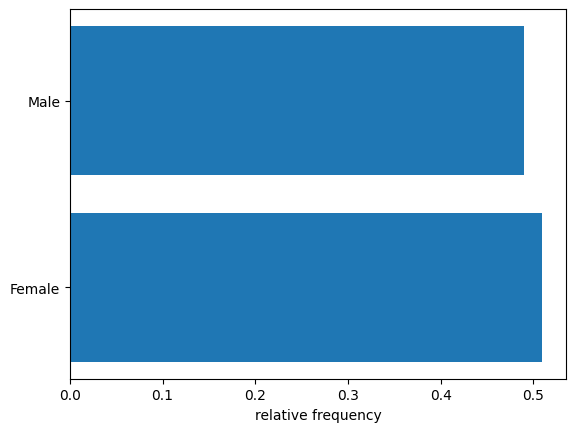

In [3]:
import matplotlib.pyplot as plt
plt.barh(ft_age.index, fi)
plt.xlabel('relative frequency')
plt.show()

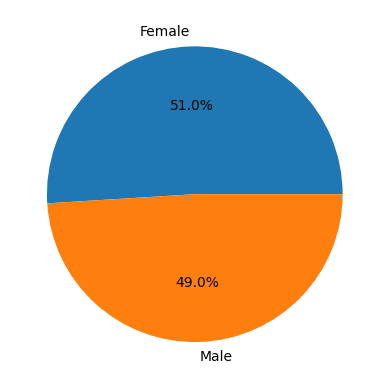

In [4]:
plt.pie(ni, labels = ft_age.index, autopct='%1.1f%%')
plt.show()

In [25]:
f'The mode is {levels[np.argmax(ni)]}'

'The mode is Female'

<h2>Interpretation</h2>
<p>As evident from the table and graphical representations, the proportions of male and female subjects in the analysis are nearly equal, with females making up a slight majority, being just 2% more prevalent.</p>

<br></br>
<h2>Analyzing variable DISEASES</h2>

In [5]:
x = np.array(data['diseases'])
levels, ni = np.unique(x, return_counts=True)
n = sum(ni)
fi = ni/n
Fi = np.cumsum(fi)
ft_age = pd.DataFrame(data=np.transpose([ni,fi, Fi]),index=levels,columns=['frequency', 'relative frequency', 'cumulative frequency'])
ft_age.to_csv('table_diseases.csv')
ft_age

,frequency,relative frequency,cumulative frequency
0,94.0,0.309211,0.309211
1,126.0,0.414474,0.723684
2,73.0,0.240132,0.963816
3,11.0,0.036184,1.000000


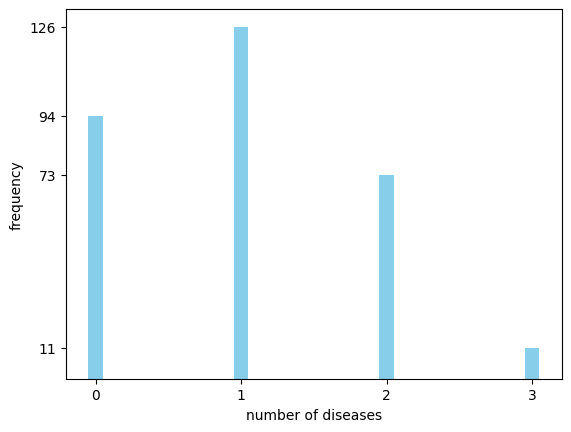

In [6]:
plt.bar(ft_age.index, ni, width=0.1, color='skyblue')
plt.ylabel('frequency')
plt.xlabel('number of diseases')
plt.xticks(ft_age.index)
plt.yticks(ni)
plt.show()

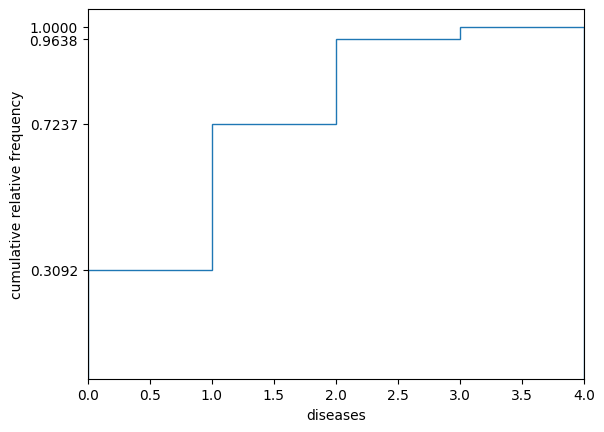

In [7]:
Fi_comp = np.insert(Fi, 0, 0)
edges = np.insert(ft_age.index, 0, 0)
edges = np.append(edges, 4)
plt.stairs(Fi_comp,edges)
plt.xlim(0,4)
plt.yticks(Fi)
plt.ylabel('cumulative relative frequency')
plt.xlabel('diseases')
plt.show()

In [8]:
f"The mean number of diseases is {data['diseases'].mean()}"

'The mean number of diseases is 1.0032894736842106'

In [9]:
f"The median number of diseases is {data['diseases'].median()}"

'The median number of diseases is 1.0'

In [10]:
f"The variation of diseases is {data['diseases'].var()}"

'The variation of diseases is 0.6963587806149035'

In [11]:
f"The standard deviation of diseases is {data['diseases'].std()}"

'The standard deviation of diseases is 0.8344811445532508'

In [12]:
f"The skewness of diseases is {skew(data['diseases'])}"

'The skewness of diseases is 0.36930650443996277'

In [13]:
f"The kurtosis of diseases is {kurtosis(data['diseases'])}"

'The kurtosis of diseases is -0.6637674922948209'

<h2>Interpretation</h2>
<p>The graphs and the table reveal that the distribution of diseases in the dataset is heavily concentrated in the lower ranges, with the majority of individuals having 1 or 0 diseases.

Specifically:
About 30.92% of individuals have no diseases.
By the time we reach 1 disease, approximately 72.37% of the data is accounted for, and 96.38% by 2 diseases.
The number of individuals with 3 is quite small.

The population is mostly composed of individuals with fewer diseases, with a relatively small portion of the population experiencing more severe cases.</p>

<br></br>
<h2>Analyzing variable AGE</h2>

In [14]:
x = np.array(data['age_years'])
bins = np.array([  0., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 70., 100.])
ni = np.histogram(x, bins = bins)[0]
lo = bins[:-1]
hi = bins[1:]
n = sum(ni)
fi = ni/n
Fi = np.cumsum(fi)
ft_age = pd.DataFrame(data=np.transpose([lo, hi, ni,fi, Fi]),columns=['lo', 'hi', 'frequency', 'relative frequency', 'cumulative frequency'])
ft_age.to_csv('table_diseases.csv')
ft_age

,lo,hi,frequency,relative frequency,cumulative frequency
0,0.0,10.0,23.0,0.075658,0.075658
1,10.0,15.0,23.0,0.075658,0.151316
2,15.0,20.0,26.0,0.085526,0.236842
3,20.0,25.0,19.0,0.062500,0.299342
4,25.0,30.0,17.0,0.055921,0.355263
5,30.0,35.0,21.0,0.069079,0.424342
6,35.0,40.0,34.0,0.111842,0.536184
7,40.0,45.0,24.0,0.078947,0.615132
8,45.0,50.0,30.0,0.098684,0.713816
9,50.0,55.0,32.0,0.105263,0.819079


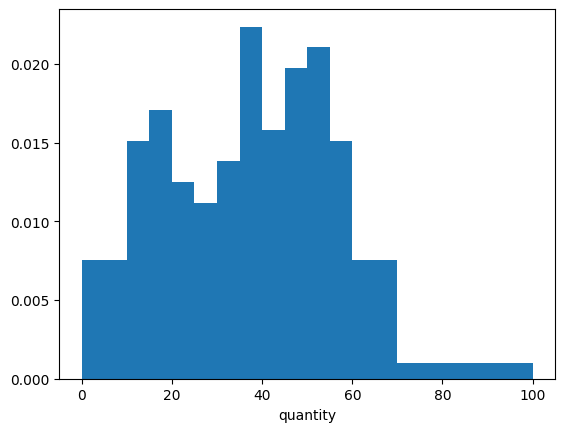

In [15]:
width = hi-lo
height = fi/width
bin_edges = np.append(lo,hi[-1])
plt.hist(bin_edges[:-1], bins = bin_edges, weights = height) 
plt.xlabel('quantity')
plt.show()

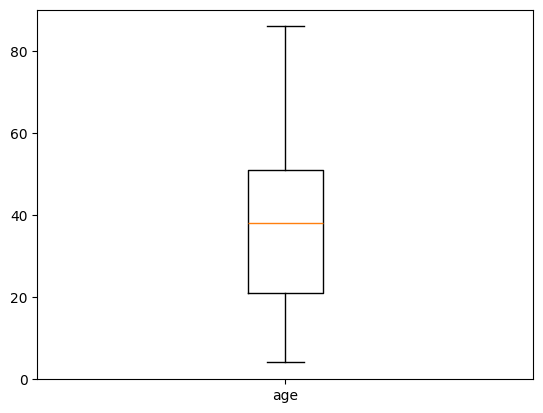

In [16]:
plt.boxplot(x)
plt.xticks([1],['age'])
plt.show()

In [17]:
f"The mean age is {data['age_years'].mean()}"

'The mean age is 37.08552631578947'

In [18]:
f"The median age is {data['age_years'].median()}"

'The median age is 38.0'

In [19]:
f"The variation of age is {data['age_years'].var()}"

'The variation of age is 336.982760118117'

In [20]:
f"The standard deviation of age is {data['age_years'].std()}"

'The standard deviation of age is 18.357090186576876'

In [21]:
f"The skewness of age is {skew(data['age_years'])}"

'The skewness of age is 0.08352232338185928'

In [22]:
f"The kurtosis of age is {kurtosis(data['age_years'])}"

'The kurtosis of age is -0.7229877452065159'

<h2>Interpretation</h2>
<p>The age distribution in this dataset shows a fairly balanced spread, with most individuals falling between 20 and 56 years old. The data captures a wide range of ages, from infants to older adults.</p>

<br></br>
<h2>General conclusion</h2>
<p>People of all ages and genders face optical diseases, 30% of whom have more than 1 visual issue. The problem of bad eyesight is still relevant regardless of the human breakthroughs in many fields and the improvement of the quality of life. There is a lot of space for further studies. For instance, this analysis gives no certainty about the existence of any correlation between eyesight and age or even gender. It could be also useful to make some predictions on the future of the problem. It is not clear if the situation becomes worse within years. If younger generation has more eye diseases, this may turn into the trend of increasing eyesight problems.</p>